In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
%matplotlib inline
sns.set()

In [3]:
RANDOM_SEED=42
random.seed(RANDOM_SEED)
os.environ["PYTHONHASHSEED"] = str(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## Датасет

Sloan Digital Sky Survey (SDSS, с англ. — «Слоуновский цифровой небесный обзор») — проект широкомасштабного исследования многоспектральных изображений и спектров красного смещения звёзд и галактик при помощи 2,5-метрового широкоугольного телескопа в обсерватории Апачи-Пойнт в штате Нью-Мексико. Проект назван в честь фонда Альфреда Слоуна.

Исследования начались в 2000 году, в ходе работы проекта было проведено картографирование более 35 % небесной сферы с фотометрическими наблюдениями порядка 500 миллионов объектов и получением спектров более чем для 3 миллионов объектов. Среднее значение красного смещения по изображениям галактик составило 0.1; для ярких красных галактик вплоть до z=0,4, для квазаров до z=5. Наблюдения в рамках обзора способствовали обнаружению квазаров со сдвигом более 6.

Проект делится на несколько фаз: SDSS-I (2000—2005), SDSS-II (2005—2008), SDSS-III (2008—2014), SDSS-IV (2014—2020). Собранные в ходе обзоров данные публикуются в виде отдельных релизов (Data Release), последний из них, DR13 опубликован в августе 2016 года.

В июле 2020 года после 20-летнего исследования астрофизики «Слоановский цифровой небесный обзор» опубликовали самую большую и подробную трехмерную карту Вселенной на сегодняшний день, заполнив 11-миллиарднолетний пробел в истории ее расширения и предоставив данные, которые поддерживает теорию плоской геометрии Вселенной и подтверждает, что разные области, кажется, расширяются с разной скоростью.

Набор данных состоит из 17 различных параметров 10000 записей

In [4]:
df = pd.read_csv('../data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Видим, что у нас нет нулевых значений в датасете, значит, ничего заполнять не нужно

### Посмотрим на описание колонок

objid = ID объекта

ra =  Координата объекта на небесной сфере, которая не меняется при суточном вращении Земли. Прямое восхождение равно угловому расстоянию по небесному экватору от точки весеннего равноденствия до круга склонений светила.

dec = Расстояние объекта от горизонта. обычно измеряется в градусах.

u, g, r, i, z = Волновые фильтры в телескопе Ультрафиолетовый, Зеленый, Красный, Ближний инфракрасный, Инфракрасный

run, rerun, camcol, field, specobjid, fiberid = Служебные поля

class = Класс объекта (галактика, звезда или квазар)

redshift = Cмещение, которое происходит, когда длина волны света или другого электромагнитного излучения объекта увеличивается или смещается в красный конец спектра

plate = Номер пластины. При каждом спектроскопическом облучении используется большая тонкая круглая металлическая пластина, которая размещает оптические волокна через отверстия, просверленные в местах изображений в фокальной плоскости телескопа. Эти волокна затем подаются в спектрографы. Каждая пластина имеет уникальный серийный номер, который называется пластиной в таких представлениях, как SpecObj, в CAS.

mjd = Модифицированная юлианская дата

Колонка class у нас целевая. Поля objid, run, rerun, camcol, field, specobjid, fiberid, plate, mjd не имеют особого смысла в задаче классификации, поэтому давайте их удалим

In [6]:
df.drop(columns=['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'fiberid', 'plate', 'mjd'], inplace=True)

In [7]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


## EDA

1. Распределение классов


Text(0.5, 1.0, 'Распределение классов в датасете по количеству')

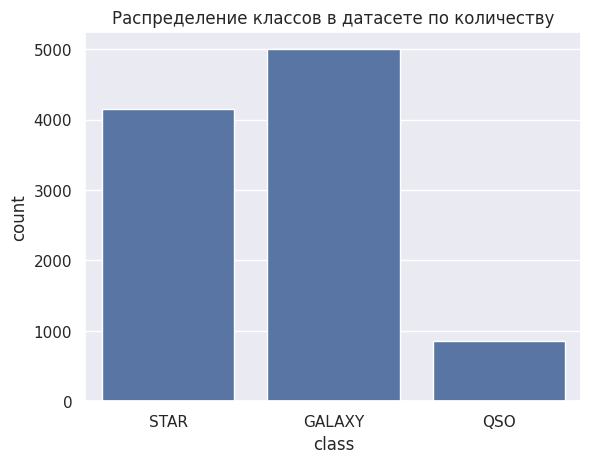

In [8]:
sns.countplot(x='class', data=df).set_title("Распределение классов в датасете по количеству")

Видим, что данные по классам распределены неравномерно, и что больше все объектов-галактик

2. Анализ числовых данных

Построим графики распределений по всем непрерывным значениям

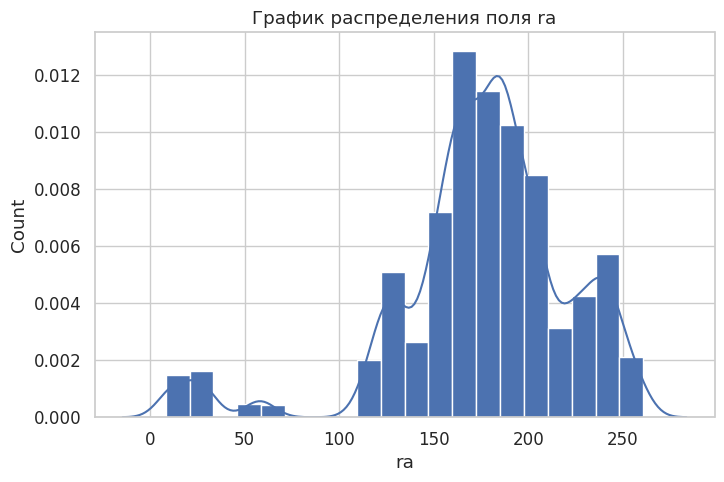

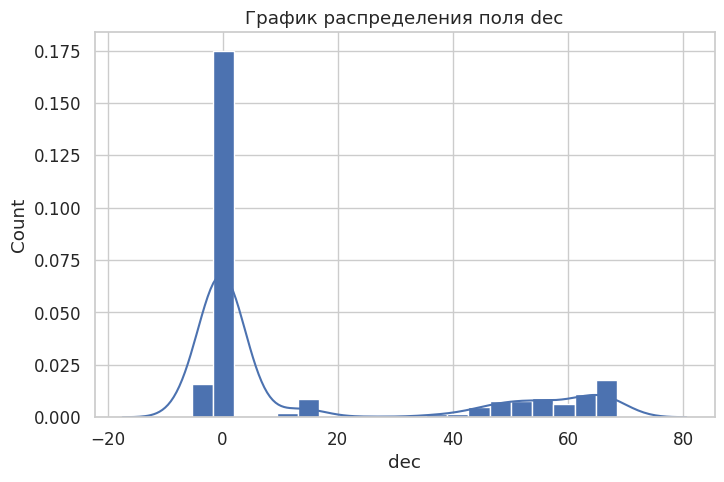

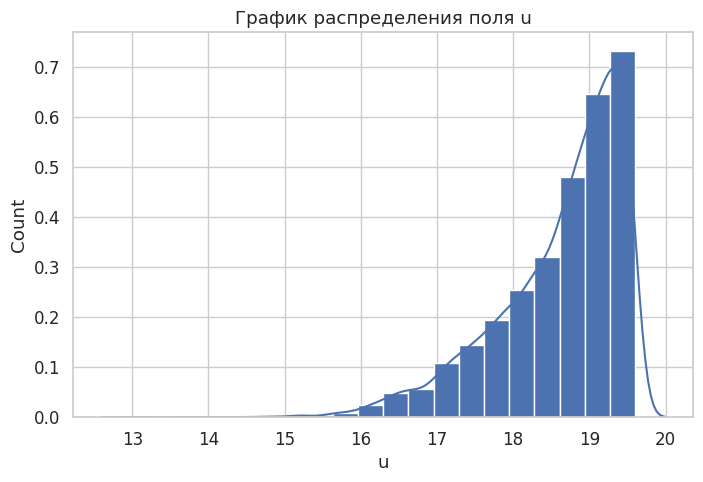

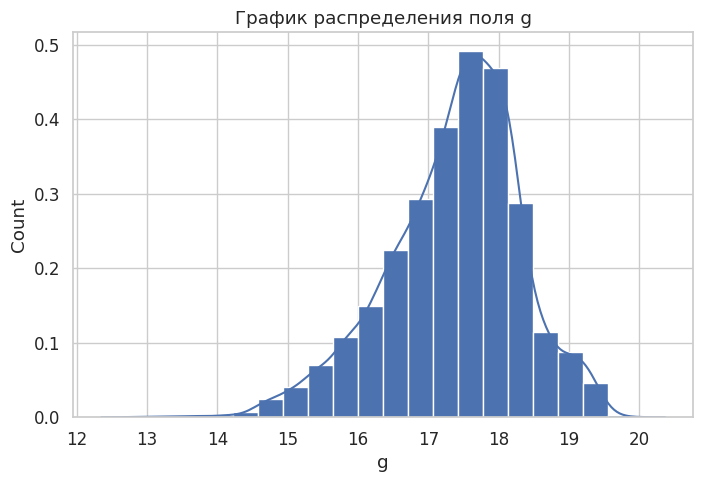

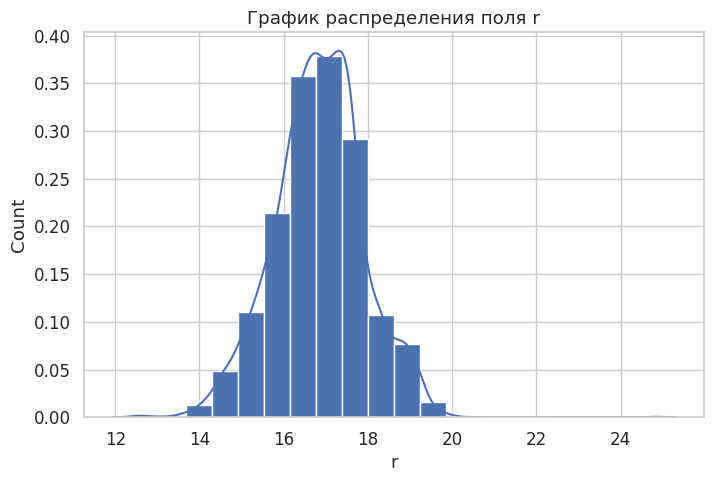

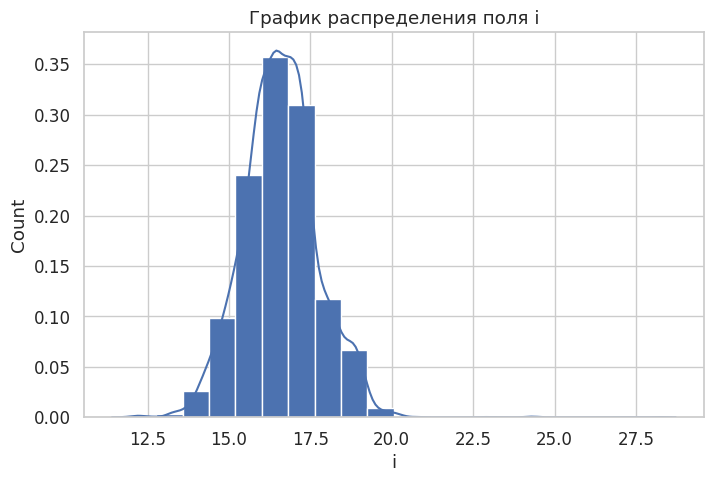

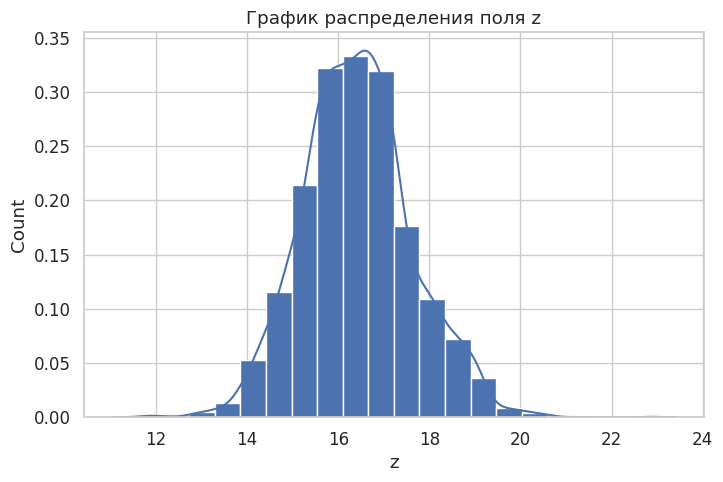

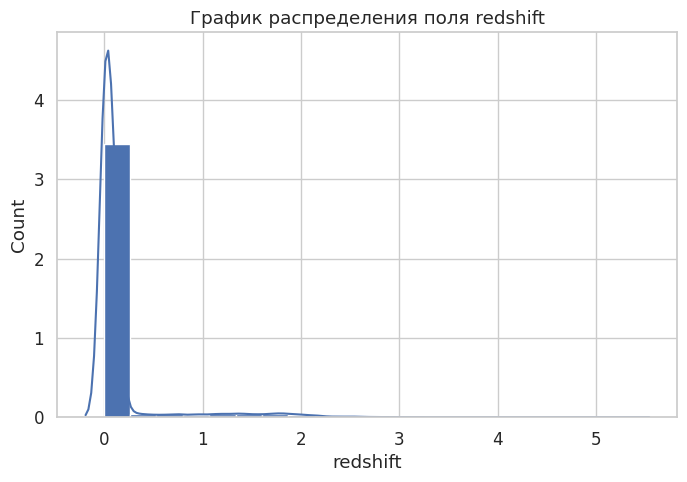

In [9]:
for column in df.select_dtypes(include=np.number).columns:
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    sns.distplot(df[column], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel=column, ylabel='Count', title = f'График распределения поля {column}')
    plt.show()

Вывод: 
 - По колонкам redshift, ra, dec видим большое количество выбросов
 - Значения колонок g, r, i, z распределены нормально

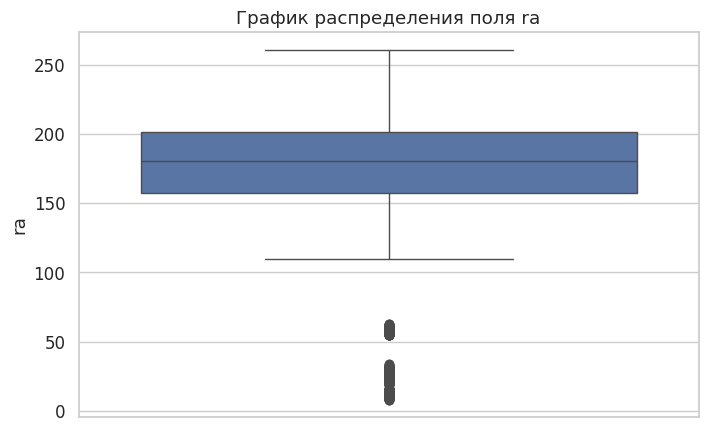

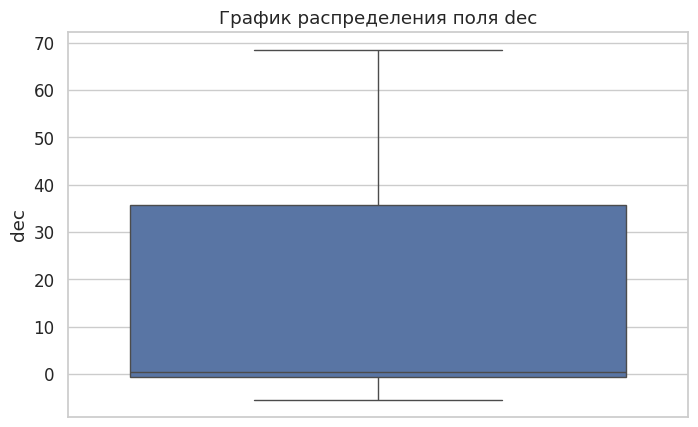

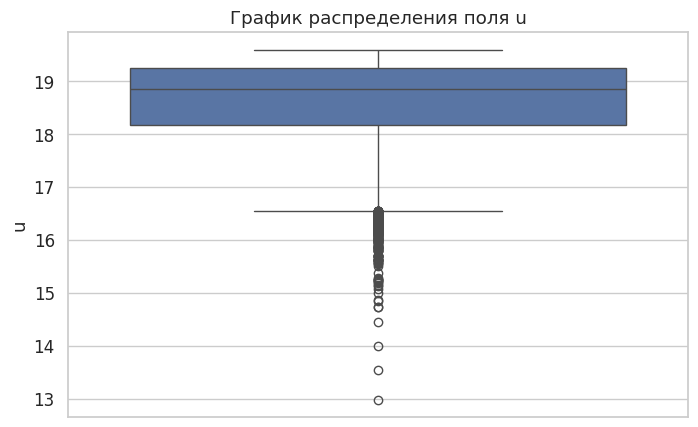

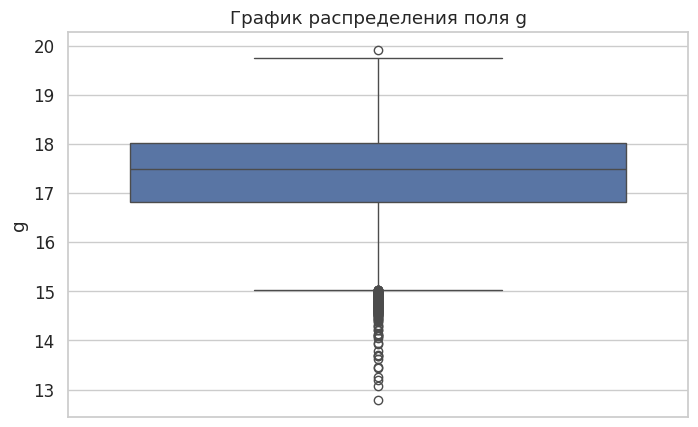

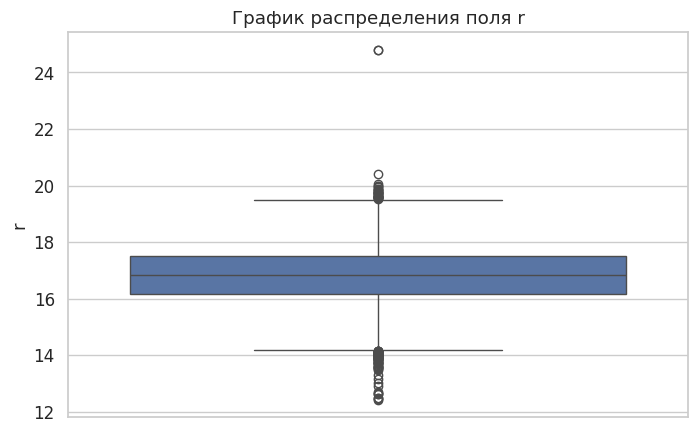

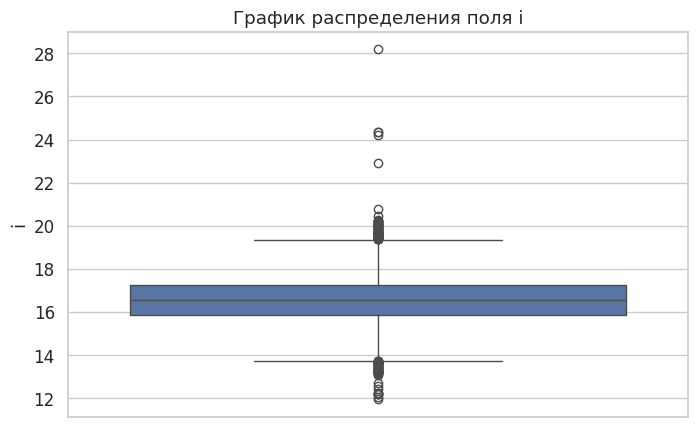

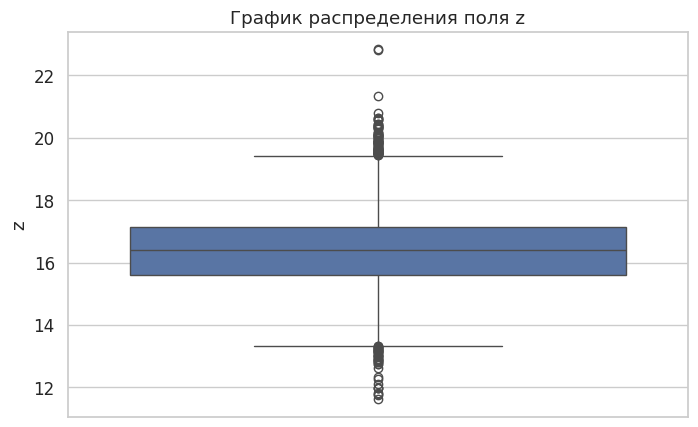

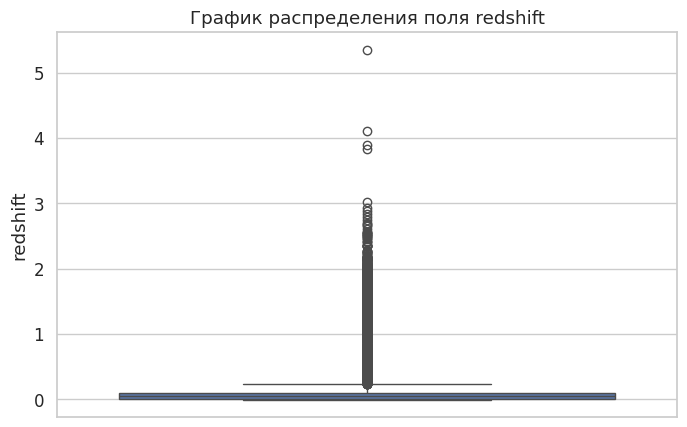

In [10]:
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[column]).set_title(f'График распределения поля {column}')
    plt.show()

Вывод аналогичен выводу по анализу гистограм

3. Распределение значений redshift для каждого класса

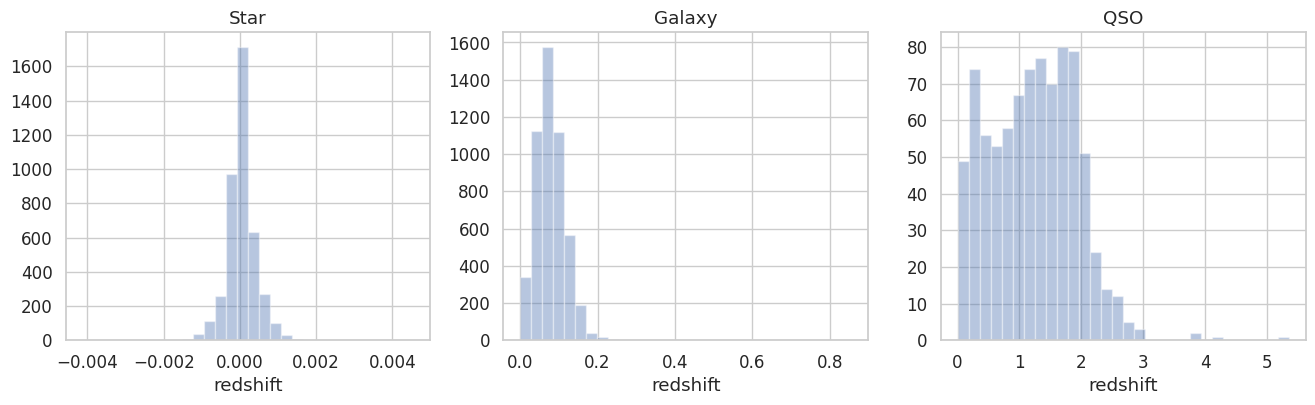

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(df[df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(df[df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

Видим, что распределение redshift отличается для каждого класса.
Redshift может быть оценкой  расстояния от Земли до объекта в космосе.

Следовательно, график распределения говорит нам, что большинство наблюдаемых звезд расположены несколько ближе к Земле, чем галактики или квазары. Галактики, как правило, находятся немного дальше, а квазары — от очень близких до очень далеких.

Похоже, что мы можем отличить классы друг от друга только на основе этого столбца, redshift, скорее всего, очень поможет в классификации новых объектов.

4. Распределение фильтров для каждого класса

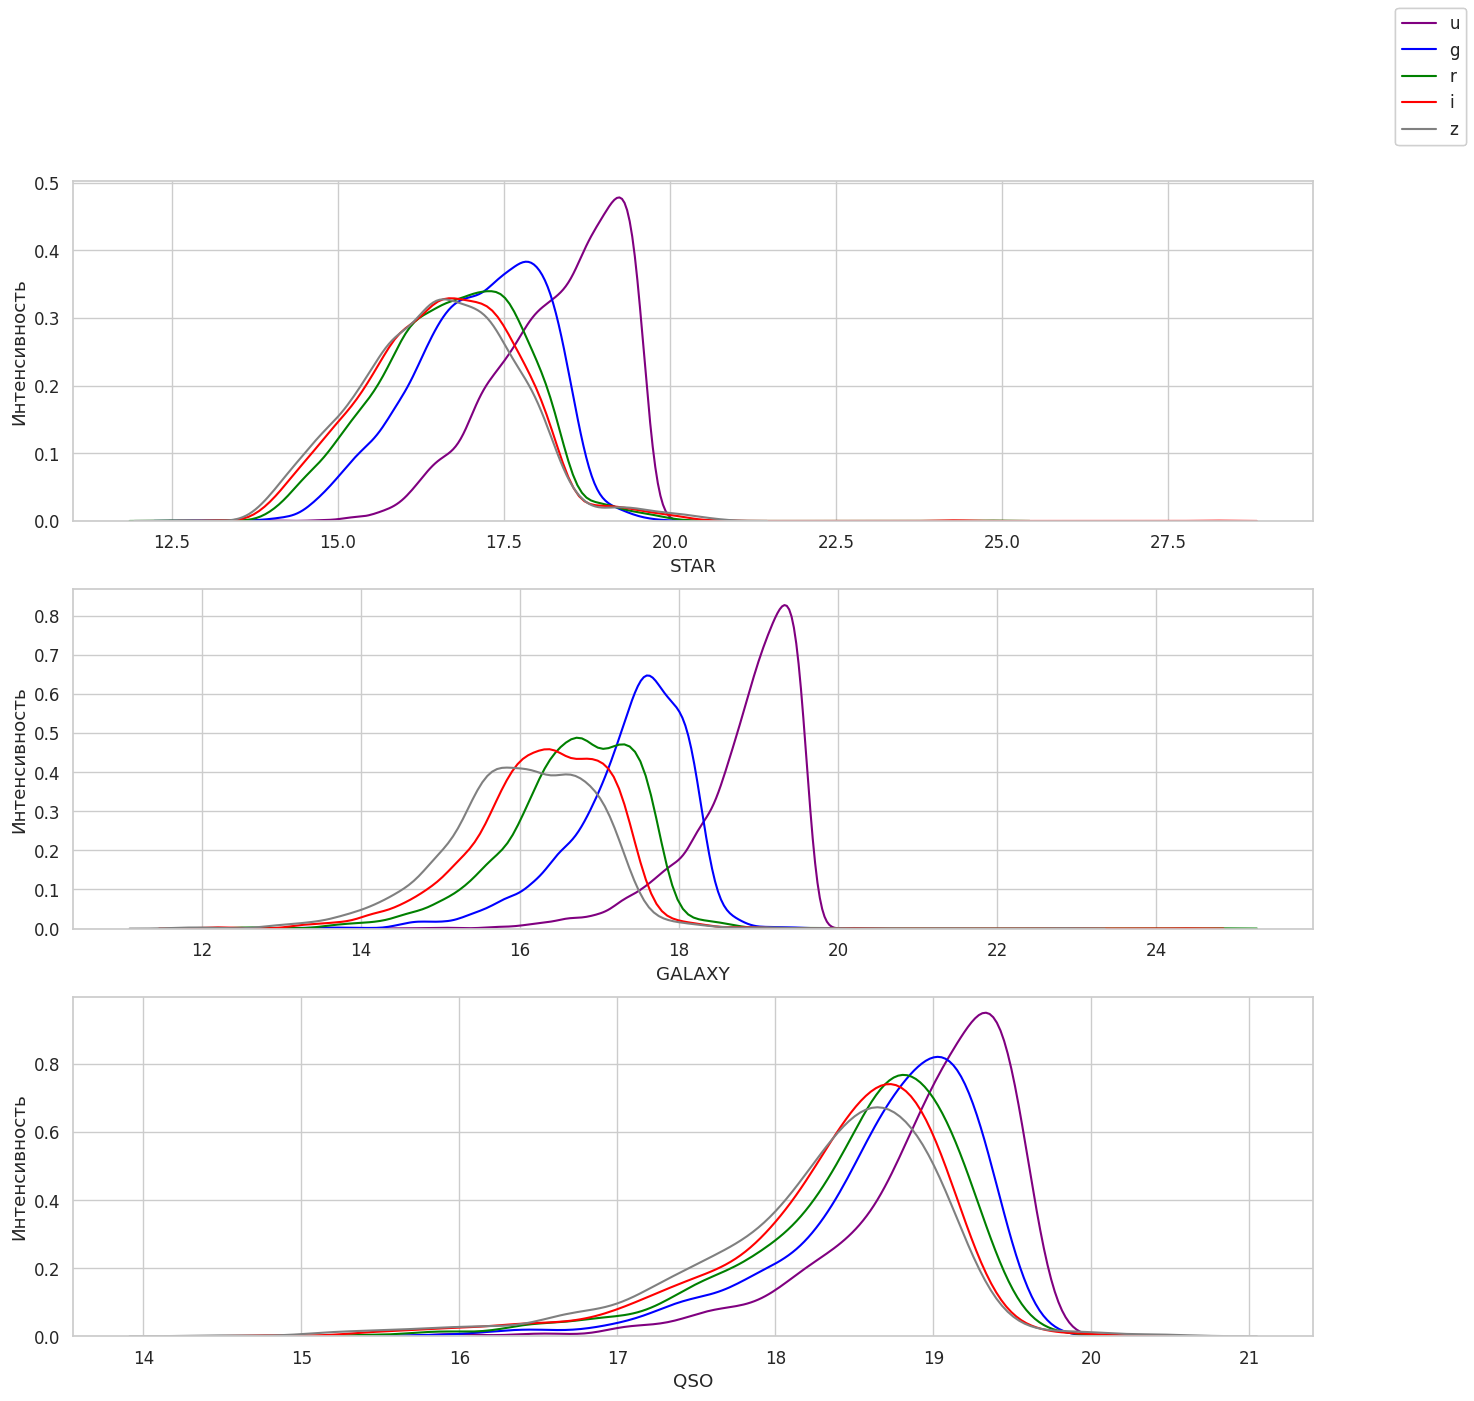

In [12]:
f, axes = plt.subplots(3, 1, figsize=(16, 15))
c = df['class'].unique()

for ax_id in range(len(c)):
    sns.distplot(df.loc[df['class']==c[ax_id],'u'], hist=False, color='purple', ax=axes[ax_id], label='u')
    sns.distplot(df.loc[df['class']==c[ax_id],'g'], hist=False, color='blue', ax=axes[ax_id], label='g')
    sns.distplot(df.loc[df['class']==c[ax_id],'r'], hist=False, color='green', ax=axes[ax_id], label='r')
    sns.distplot(df.loc[df['class']==c[ax_id],'i'], hist=False, color='red', ax=axes[ax_id], label='i')
    sns.distplot(df.loc[df['class']==c[ax_id],'z'], hist=False, color='grey', ax=axes[ax_id], label='z')
    axes[ax_id].set(xlabel=c[ax_id], ylabel='Интенсивность')
    f.legend(['u', 'g', 'r', 'i', 'z'])

5. Матрица корреляций значений фильтров

Рассмотрим матрицу корреляций для значений фильтров по каждому классу

<Axes: >

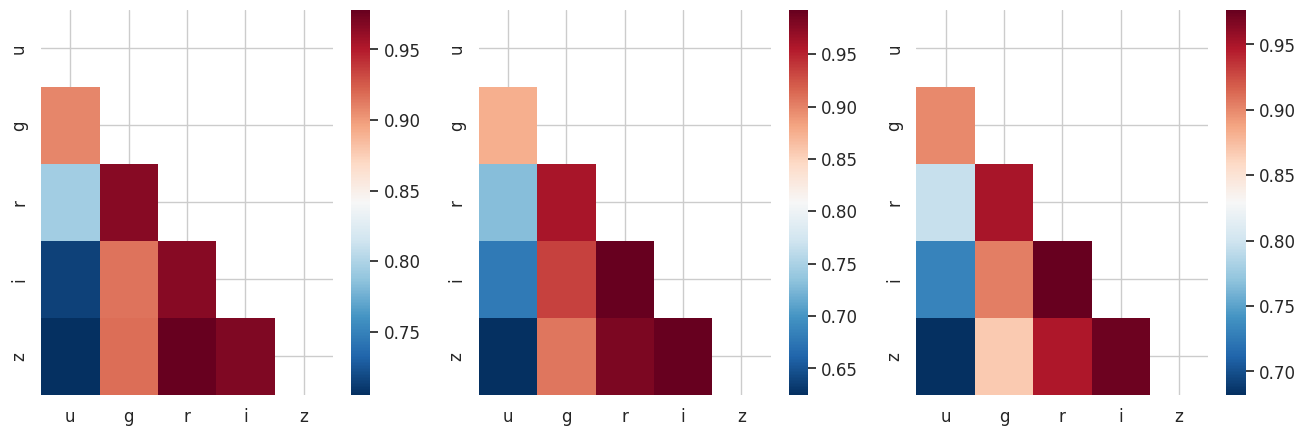

In [13]:
f, axes = plt.subplots(1, 3, figsize=(16, 5))

star_corr = df.loc[df['class']=='STAR', ['u','g','r','i','z']].corr()
galaxy_corr = df.loc[df['class']=='GALAXY', ['u','g','r','i','z']].corr()
qso_corr = df.loc[df['class']=='QSO', ['u','g','r','i','z']].corr()

msk = np.zeros_like(star_corr)
msk[np.triu_indices_from(msk)] = True

sns.heatmap(star_corr, cmap='RdBu_r', mask=msk, ax=axes[0])
sns.heatmap(galaxy_corr, cmap='RdBu_r', mask=msk, ax=axes[1])
sns.heatmap(qso_corr, cmap='RdBu_r', mask=msk, ax=axes[2])

Небольшая справка: u, g, r, i, z улавливают свет с длинами волн 355, 486, 616, 748 и 893 нм.

Мы можем сказать, что между различными полосами существует высокая корреляция. В этом нет ничего удивительного — интуитивно можно подумать, что если одна из полос захватывает какой-то объект, то и другие полосы тоже должны что-то захватить.

При этом u меньше коррелирует с другими фильтрами.

В то же время, мы видим, корреляция примерно одинакова для каждого класса

6. График прямого восхождения и склонения в зависимости от класса

<Axes: xlabel='ra', ylabel='dec'>

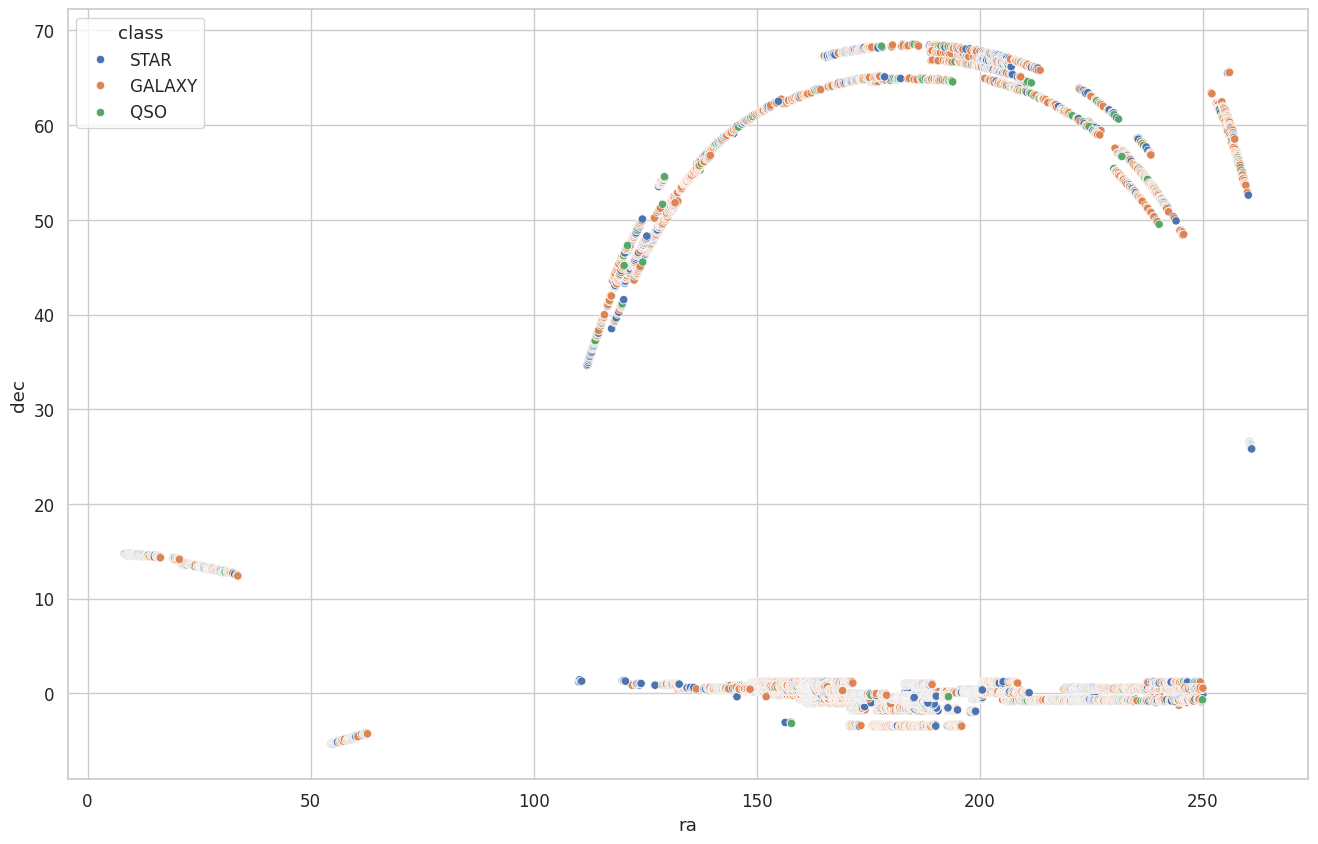

In [14]:
f, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(x='ra', y='dec', hue='class', data=df)

Как видно из графика, координаты между тремя классами существенно не различаются. Есть некоторые отклонения от звезд и галактик, но по большей части координаты находятся в одном диапазоне.
Это потому что изображения SDSS покрывают одну и ту же область неба. График выше говорит нам, что звезды, галактики и квазары наблюдаются одинаково во всех координатах в этой области. Так что куда бы SDSS ни «смотрел» — шанс наблюдать звезду, галактику или квазар всегда один и тот же.